
Attaching package: ‘CombMSC’

The following object is masked from ‘package:stats’:

    BIC


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



time series starts 2000-01-03
time series ends   2011-12-30


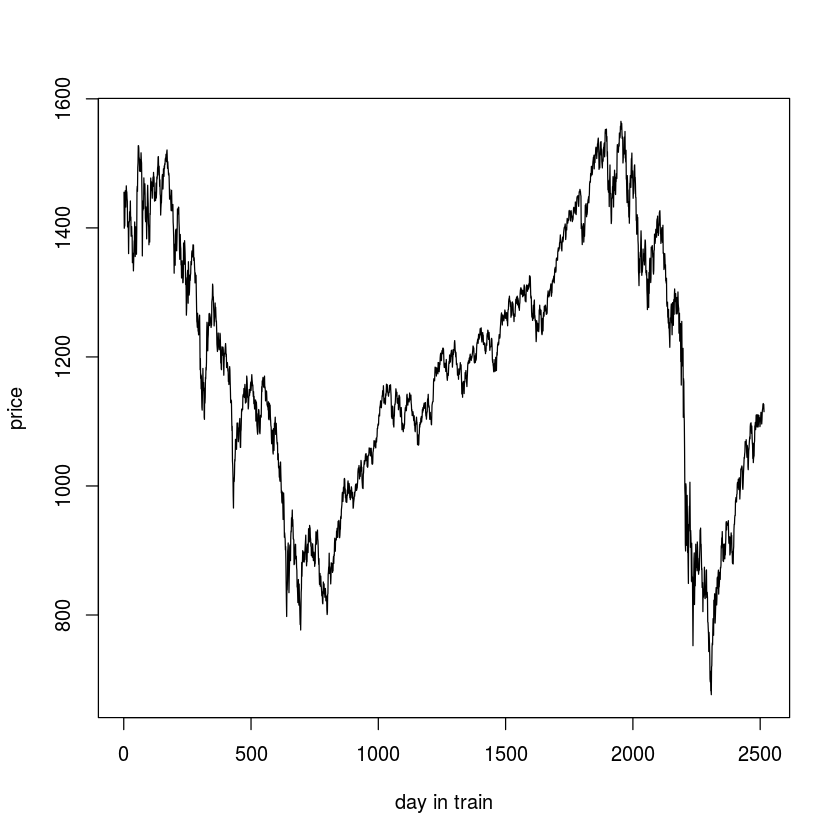

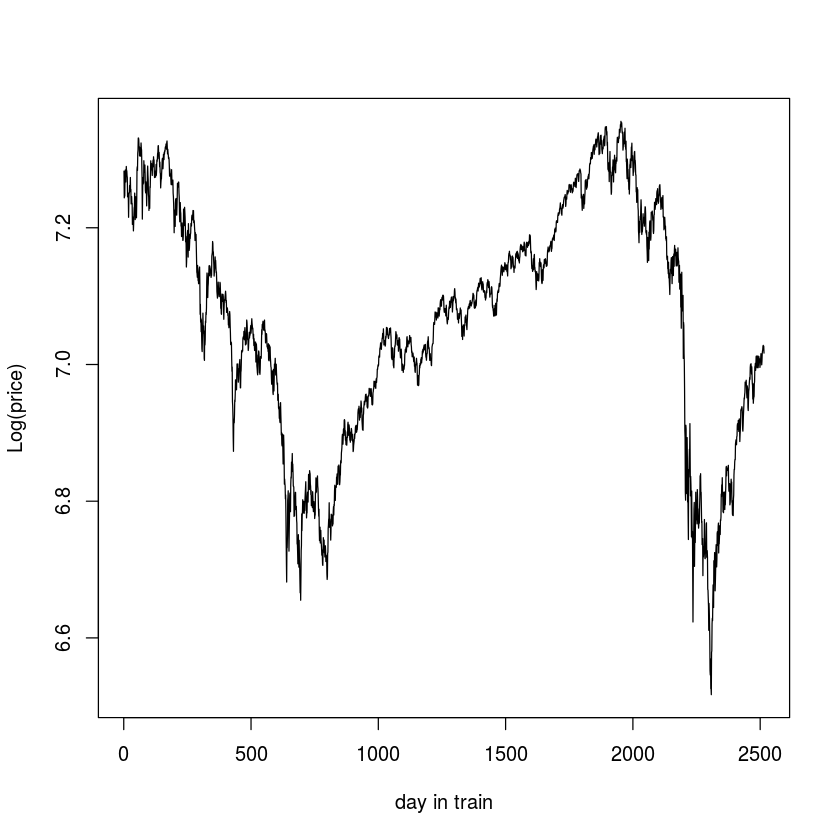

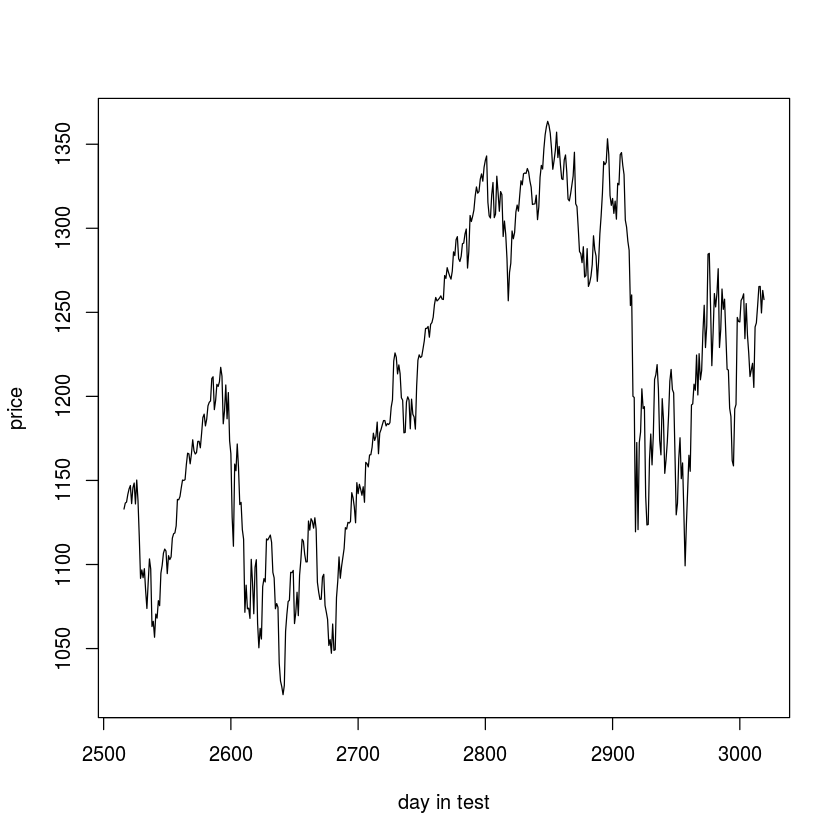

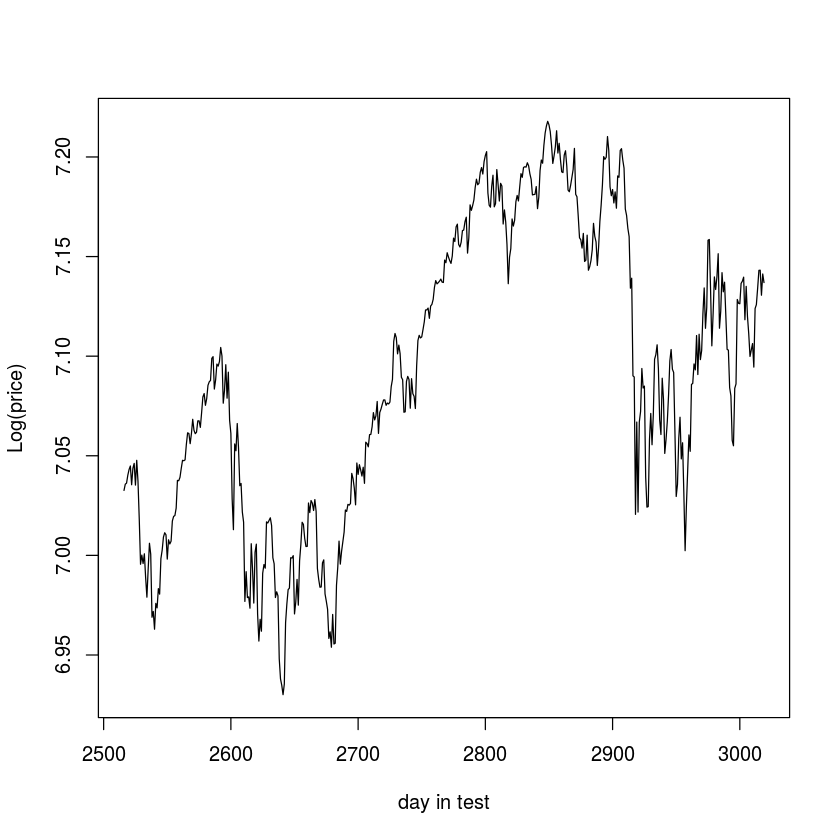

In [1]:
library(CombMSC)
library(tseries)
library(zoo)

library('forecast')


spy = get.hist.quote(instrument = "^GSPC", "2000-01-01", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train_test = get.hist.quote(instrument = "spy$train", "2011-01-01", "2011-12-31",quote = c("AdjClose"),
#provider = c("yahoo"), method = NULL, compression = "d",
#retclass = c("zoo"), quiet = FALSE, drop = FALSE)


#spy$train =ts(spy$train, frequency=7)

test_len = 504

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy$test,ylab='price', xlab='day in test')
plot.ts(log(spy$test), ylab="Log(price)", xlab="day in test")

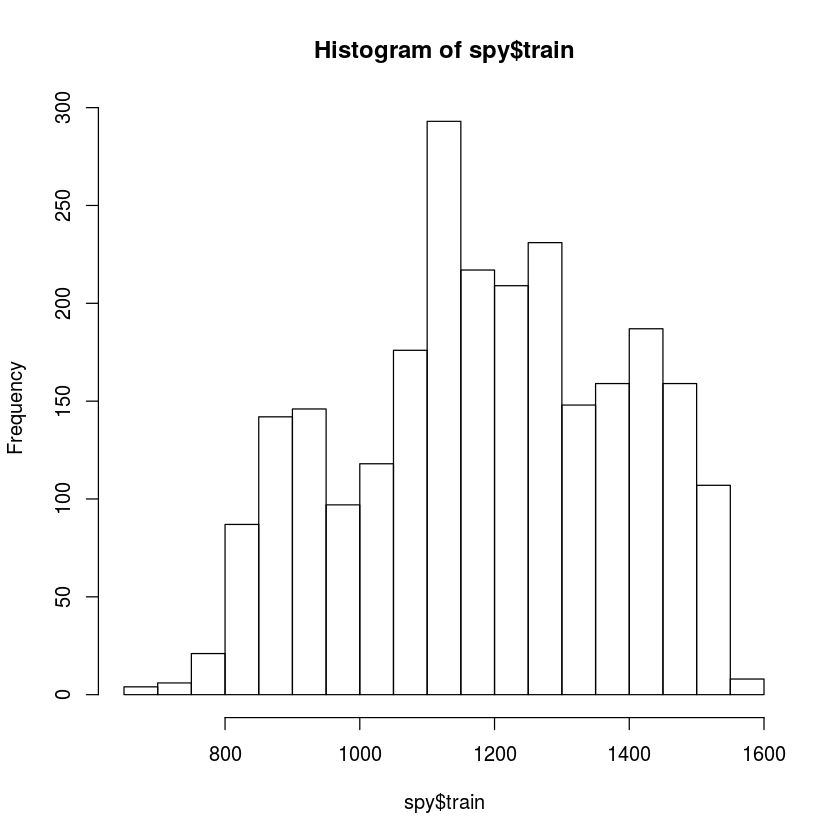

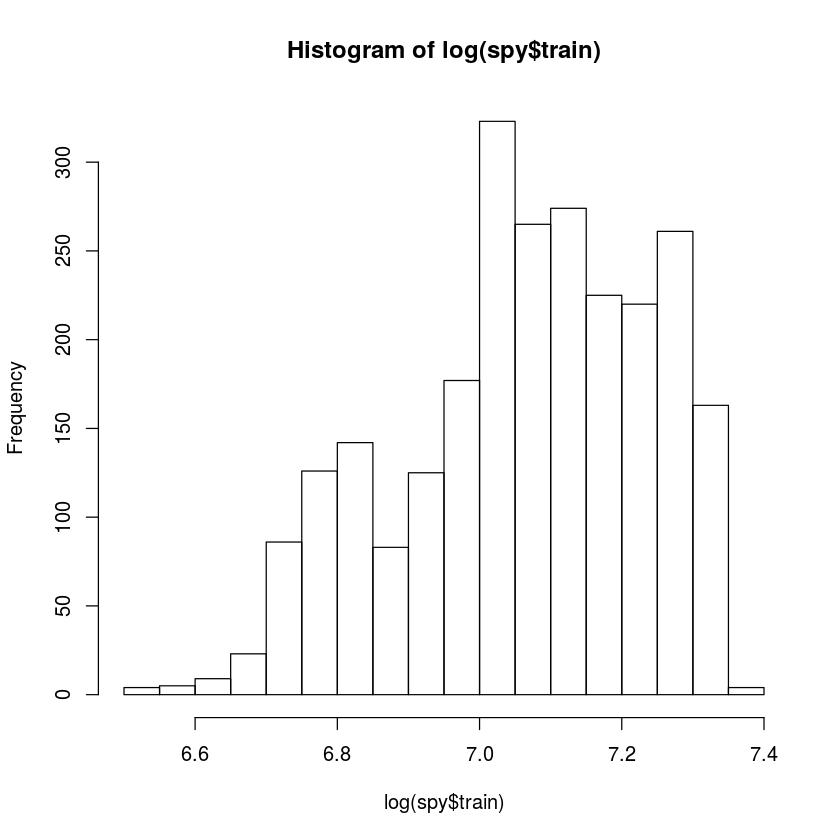

In [2]:
hist(spy$train)
hist(log(spy$train))

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

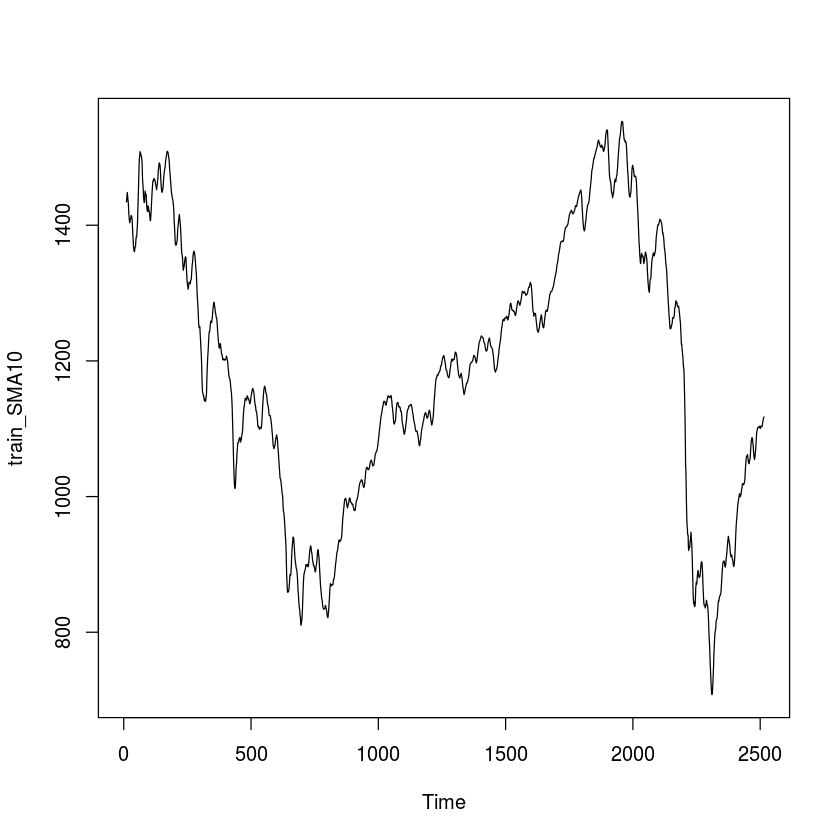

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.01493982,2.069499,1.456094,-0.0001767476,0.1282829,0.4882746,-0.0182734,NA
Test set,82.27065792,119.817750,97.402518,6.3419739253,7.7549040,32.6621564,0.9833394,7.123633


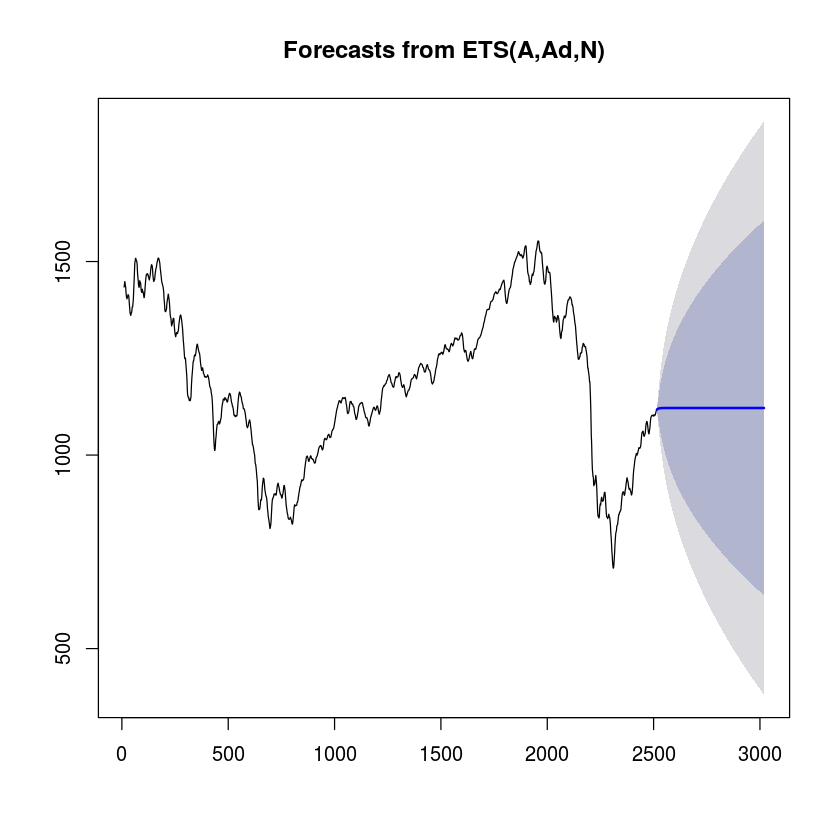

In [3]:
#install.packages('TTR')
library("TTR")


train_SMA10 <- SMA(spy$train,n=10)
plot.ts(train_SMA10)
SMA10_forecast <- forecast(train_SMA10, h=test_len)
plot(SMA10_forecast)
accuracy(SMA10_forecast, spy$test)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

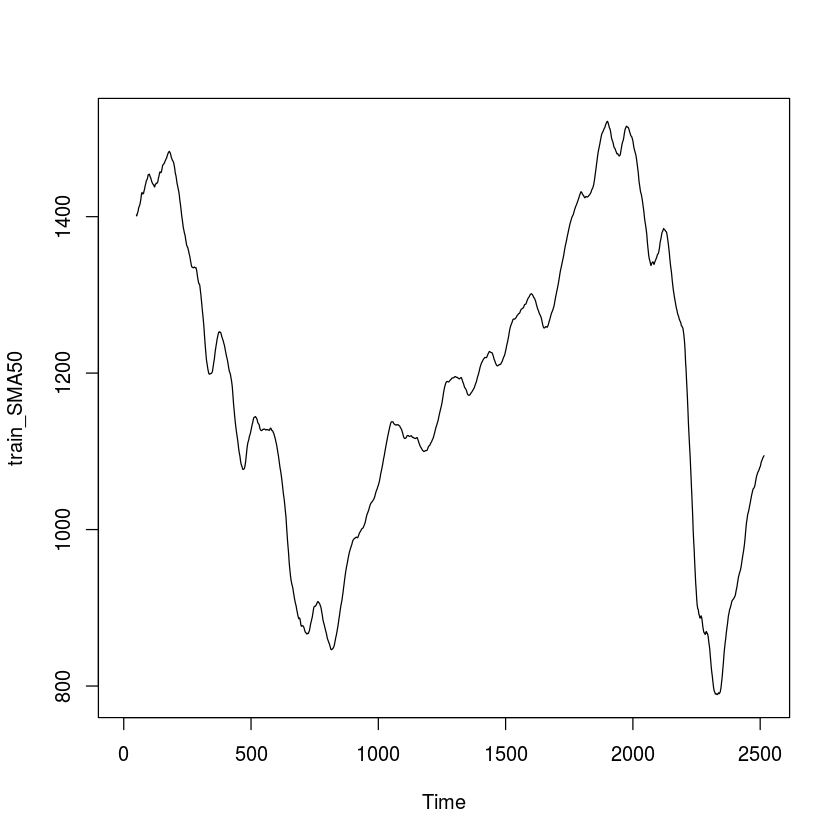

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.002684482,0.4339072,0.3046465,0.0000650306,0.02664568,0.2269992,0.00751286,NA
Test set,91.480316615,125.4467859,102.3024374,7.1191420385,8.13458975,76.2279144,0.98308633,7.456316


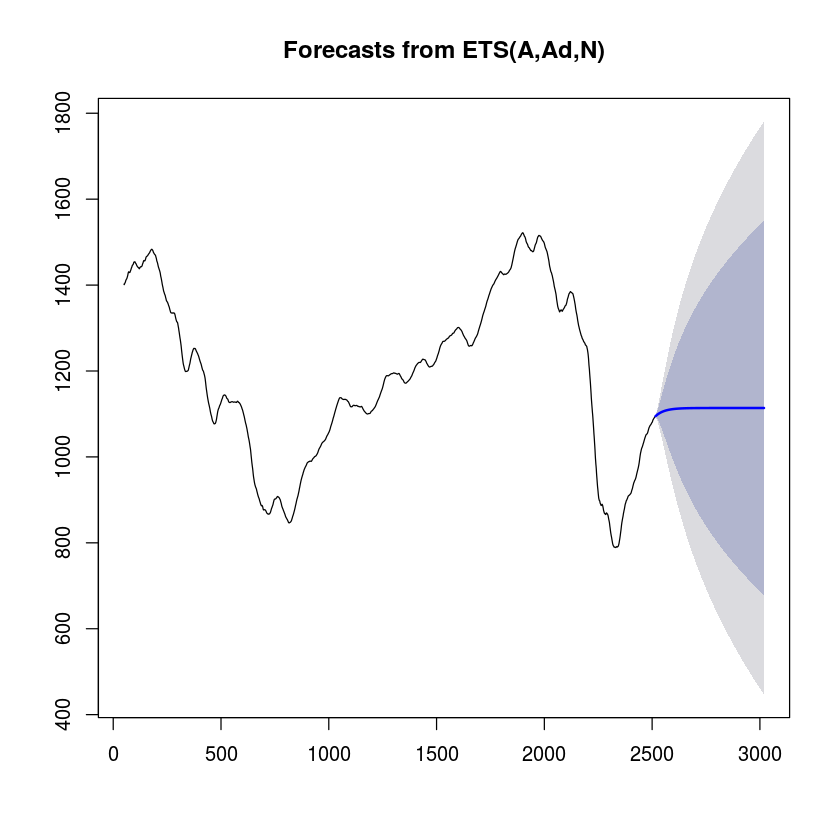

In [4]:
train_SMA50 <- SMA(spy$train,n=50)
plot.ts(train_SMA50)
SMA50_forecast <- forecast(train_SMA50, h=test_len)
plot(SMA50_forecast)
accuracy(SMA50_forecast, spy$test)

Warning message in ets(object, lambda = lambda, allow.multiplicative.trend = allow.multiplicative.trend, :
“Missing values encountered. Using longest contiguous portion of time series”

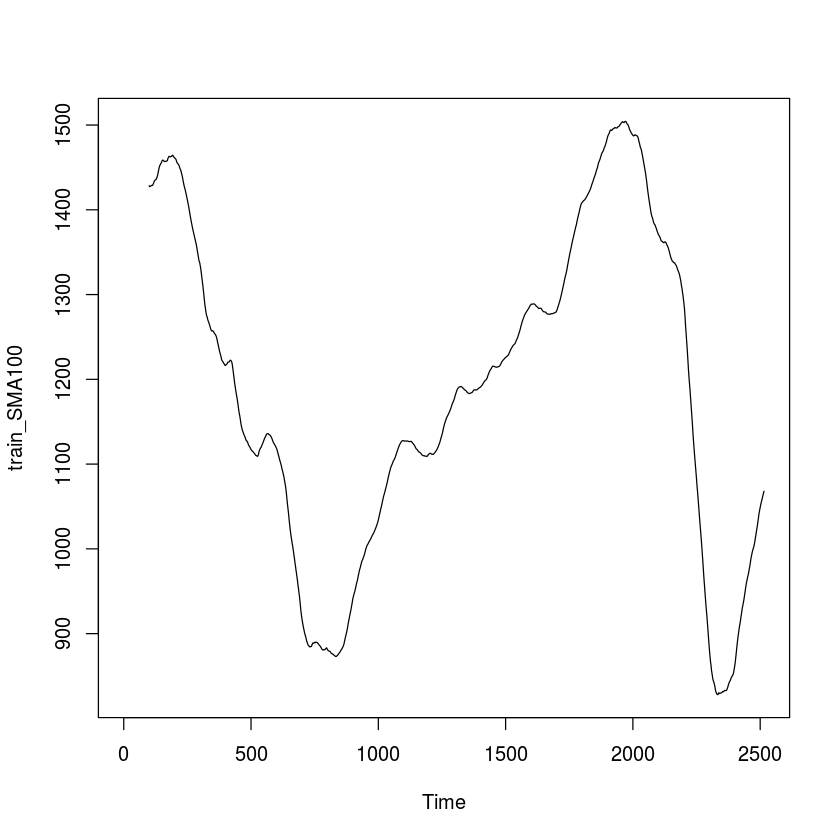

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,7.962210e-04,0.2094303,0.1495096,2.356359e-04,0.01312212,0.1523777,0.008747766,NA
Test set,-1.389323e+02,188.8530900,149.7383978,-1.155342e+01,12.47873839,152.6109398,0.987274552,12.0601


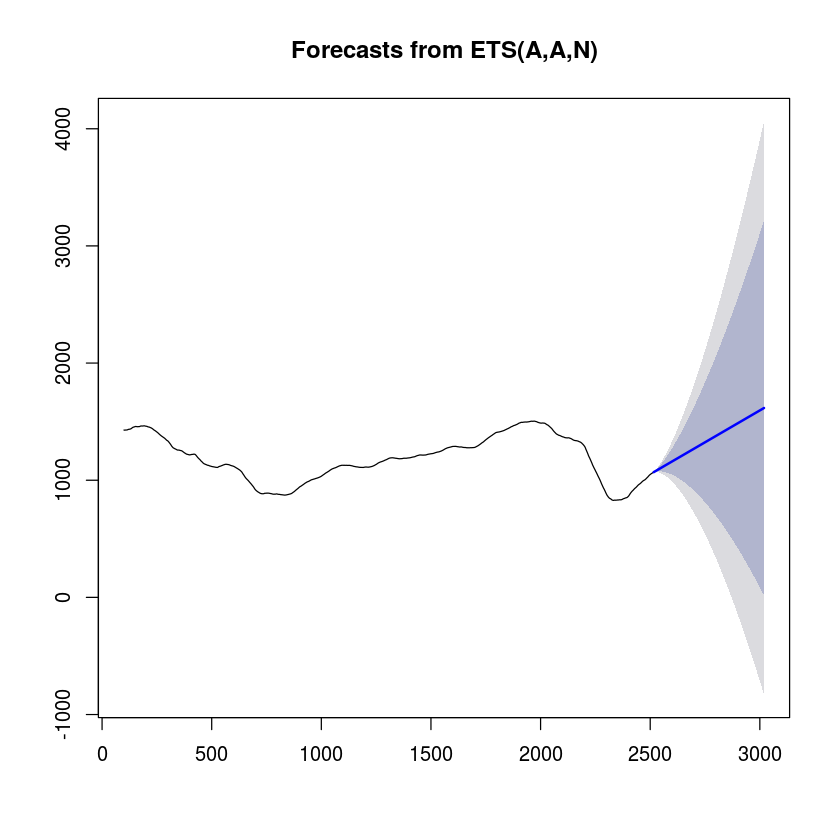

In [5]:
train_SMA100 <- SMA(spy$train,n=100)
plot.ts(train_SMA100)
SMA100_forecast <- forecast(train_SMA100, h=test_len)
plot(SMA100_forecast)
accuracy(SMA100_forecast, spy$test)

In [6]:
train_HW <- HoltWinters(spy$train, beta=FALSE, gamma=FALSE)
train_HW

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = spy$train, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.899923
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 1116.232

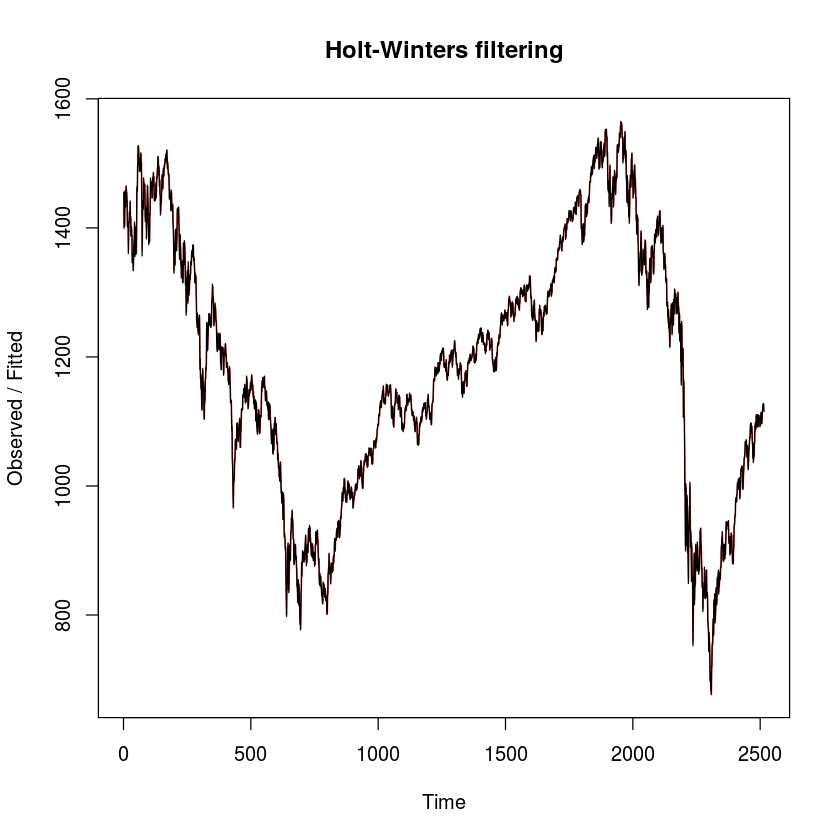

In [7]:
plot(train_HW)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.1498351,15.18317,10.63088,-0.02242496,0.9389887,0.9965771,0.007096615,NA
Test set,87.5701198,123.55263,100.51581,6.78422204,7.9955473,9.4227167,0.983291997,7.343377


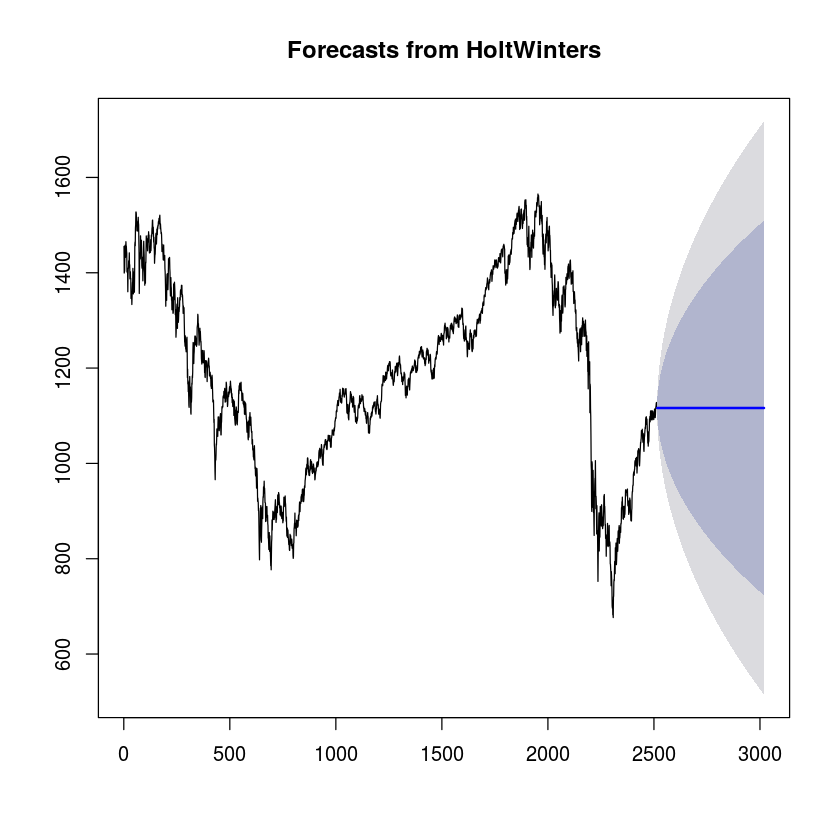

In [8]:

train_HWforecast = forecast.HoltWinters(train_HW, h=504)
plot(train_HWforecast)

accuracy(train_HWforecast, spy$test)